<span style="font-size:24pt; color:blue; font-family: 'Times New Roman'">P-box Notebook 
    <span style="color:green;"> for creating AR6 style P-box data </span>
</span>
<br>
<span style="font-size:12pt; color:black; font-family:Georgia, serif;font-style:italic">by Praveen Kumar and Robert Kopp.</span>
<br>
<br>
<span style="font-family: 'Times New Roman'; font-size:16pt; color:black"> 
    This is a notebook that can be used to create and visualize P-box data from <a href="https://doi.org/10.5194/egusphere-2023-14" style="color:blue; text-decoration:underline;">FACTS 1.0</a>
    output. This notebook groups *.nc files from a FACTS experiment folder and arranges them under respective workflows and ssp folders. This generated workflow folder is subsequently used to generate the Pbox files and folders. <br>
</span>
<span style="font-family: 'Times New Roman'; font-size:12pt; color:red"> Note: There will be three folders created within this directory as part of this notebook. 
</span>
<br>
<br>
<span style="font-family:'Courier New', monospace; font-size:12pt; color:black"> <b>Background::</b> <br>
    In order to represent deep uncertainty one can construct Probability boxes (p-boxes) which is an envelope encompassing alternative probability distributions for describing the same variables. Take for example, the deep uncertainity associated with the total global mean sea level (GMSL)contribution from the Antarctic Ice Sheet (AIS). Projections of AIS GMSL component upto 2100 can be obtained from either an Emulator, Linear Antarctic Response Model, Models which include processes of Marine Ice Cliff Instability or structured expert judgement. Pboxes in this context will present a way of vizualizing the uncertainity based on the model used for projecting AIS contribution to global mean sea level. 
    <br> 
    Within this notebook, we construct four p-boxes: <strong>pb_1e, pb_1f, pb_2e,</strong> and <strong>pb_2f</strong>.
    <br>
</span>

<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> Set <b>Experiment </b> Folder ::
    <span style="font-size:14pt; color:green;"> point to where FACTS raw output is located (e.g. /facts/experiments) </span>

</span>

In [1]:
facts_output_folder="/projects/kopp/facts-experiments/221217"
#
region = 'global'
#
import fun_1_AR6_style_Pbox_ as fn
#
ssps=["ssp119","ssp126","ssp245","ssp370","ssp585"]

<br>
<span style="font-family:'Courier New', monospace; font-size:12pt; color:black"> 
    From the FACTS raw output, begin by grouping *.nc files into workflows and ssp. The workflows used within this notebook are same as those in IPCC AR6 and have been defined in the file "fun_1_AR6_style_Pbox_.py". Below is the list of workflows.   
</span>

In [2]:
fn.workflow_dataframe()

,Workflow,GrIS,AIS,glaciers
0,wf1e,emuGrIS.emulandice.GrIS,emuAIS.emulandice.AIS,emuglaciers.emulandice.glaciers
1,wf1f,GrIS1f.FittedISMIP.GrIS_GIS,ar5AIS.ipccar5.icesheets_AIS,ar5glaciers.ipccar5.glaciers
2,wf2e,emuGrIS.emulandice.GrIS,larmip.larmip.AIS,emuglaciers.emulandice.glaciers
3,wf2f,GrIS1f.FittedISMIP.GrIS_GIS,larmip.larmip.AIS,ar5glaciers.ipccar5.glaciers
4,wf3e,emuGrIS.emulandice.GrIS,deconto21.deconto21.AIS_AIS,emuglaciers.emulandice.glaciers
5,wf3f,GrIS1f.FittedISMIP.GrIS_GIS,deconto21.deconto21.AIS_AIS,ar5glaciers.ipccar5.glaciers
6,wf4,bamber19.bamber19.icesheets_GIS,bamber19.bamber19.icesheets_AIS,ar5glaciers.ipccar5.glaciers


<br>
<span style="font-family:'Courier New', monospace; font-size:12pt; color:black"> 
    Note that FACTS outputs samples which will have to be converted to quantiles. In the cell below, the files as described in the workflows above will be converted to quantiles and saved within a "1_workflow" folder that is created within this current directory. 
</span>
<br>
<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> Generate::
    <span style="font-size:14pt; color:green;">Quantile files from FACTS output and arrange in workflow/ssp_val folders </span>

</span>


In [3]:
fn.generate_pbox_nc_files_(facts_output_folder,region,ssps,"1_workflow")

<br>
<span style="font-family:'Courier New', monospace; font-size:12pt; color:black"> 
   Next we will generate the Pboxes. 
</span>
<br>
<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> Generate::
    <span style="font-size:14pt; color:green;">Pbox files and folders </span>

</span>

In [4]:
specify_pbox_files = {
            'pb_1e': {
                'files_to_cp':      [('wf2e', 'larmip.AIS'), ('wf2e', 'total.workflow')],
                'AIS_pb':           ["emulandice.AIS", "larmip.AIS"],
                'total_pb':         ["total.workflow.wf1e", "total.workflow.wf2e"],
                'rm_pattern_xcpt':  [('*AIS*', 'icesheets-AIS-pb*'),('*total*', '*total-workflow-pb*')]
            },
            'pb_1f': {
                'files_to_cp':      [('wf2f', 'larmip.AIS'), ('wf2f', 'total.workflow')],
                'AIS_pb':           ["ipccar5.icesheets_AIS", "larmip.AIS"],
                'total_pb':         ["total.workflow.wf1f", "total.workflow.wf2f"],
                'rm_pattern_xcpt':  [('*AIS*', 'icesheets-AIS-pb*'),('*total*', '*total-workflow-pb*')]
            },
            'pb_2e': {
                'files_to_cp':      [('wf1e', 'emulandice.AIS'), ('wf3e', 'deconto21.AIS'), ('wf4', 'bamber19.icesheets_AIS'), 
                                     ('wf4', 'bamber19.icesheets_GIS'), ('wf1f', 'ipccar5.glaciers'),
                                     ('wf1e', 'total.workflow'), ('wf3e', 'total.workflow'), ('wf4', 'total.workflow')],
                'AIS_pb':           ["emulandice.AIS", "larmip.AIS", "deconto21.AIS", "bamber19.icesheets_AIS"],
                'GIS_pb':           ["emulandice.GrIS", "bamber19.icesheets_GIS"],
                'glacier_pb':       ["emulandice.glaciers", "ipccar5.glaciers"],
                'total_pb':         ["total.workflow.wf1e", "total.workflow.wf2e", "total.workflow.wf3e", "total.workflow.wf4"],
                'rm_pattern_xcpt':  [('*AIS*', 'icesheets-AIS-pb*'),('*total*', '*total-workflow-pb*'),
                                     ("*GIS*", "icesheets-GIS-pb*"), ("*glaciers*", "glaciers-pb*"),]
            },
            'pb_2f': {
                'files_to_cp':      [('wf1f', 'ipccar5.icesheets_AIS*'), ('wf3f', 'deconto21.AIS*'), 
                                     ('wf4', 'bamber19.icesheets_AIS*'), ('wf4', 'bamber19.icesheets_GIS'),
                                     ('wf1f', 'total.workflow'), ('wf3f', 'total.workflow'),('wf4', 'total.workflow')],
                'AIS_pb':           ["ipccar5.icesheets_AIS", "larmip.AIS", "deconto21.AIS", "bamber19.icesheets_AIS"],
                'GIS_pb':           ["GrIS1f.FittedISMIP.GrIS", "bamber19.icesheets_GIS"],
                'total_pb':         ["total.workflow.wf1f", "total.workflow.wf2f", "total.workflow.wf3f", "total.workflow.wf4"],
                'rm_pattern_xcpt':  [('*AIS*', 'icesheets-AIS-pb*'),('*total*', '*total-workflow-pb*'),
                                     ("*GIS*", "icesheets-GIS-pb*")]
            }
}
fn.create_Pbox(ssps,specify_pbox_files,"2_pbox")

... created pb_1e folder
... created pb_2e folder
... created pb_1f folder
... created pb_2f folder


<br>
<span style="font-family:'Courier New', monospace; font-size:12pt; color:black"> 
   Pbox files are then arranged based on low and medium confidence as described in the IPCC AR6. 
</span>
<br>
<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> Generate::
    <span style="font-size:14pt; color:green;">Confidence level files files and folders </span>

</span>


In [5]:
import os
path = fn.create_directory("3_confidence_level_files","remove")
fn.generate_confidence_files(os.getcwd()+'/2_pbox', path)

<br>
<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> PLOT::
    <span style="font-size:14pt; color:green;">Four alternative probability distributions for SSP1-2.6 and SSP5-8.5scenario, including ISMIP6 (wf1e,light blue), the Linear Antarctic Response Model Intercomparison Project (wf2e; dark blue), the Antarctic marine ice cliff instability-permitting projection (wf3e; orange) and the structured expert judgement ice-sheet projection (wf4; red).</span>

</span>
<br>
<br>
<span style="font-family: 'Times New Roman'; font-size:14pt; color:red"> 
    See Figure 1 in <a href="https://doi.org/10.1038/s41558-023-01691-8" style="color:blue; text-decoration:underline;">Kopp et al. (2023)</a>



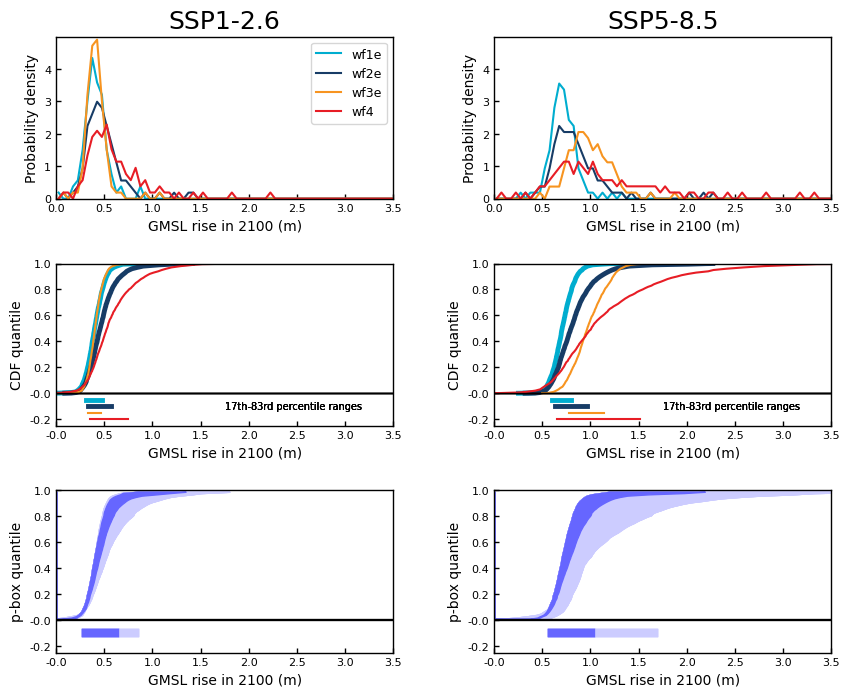

In [6]:
import fun_1_AR6_style_Pbox_PLOT as fn_PLOT
#
loc=0
ssp=['ssp126','ssp585']
path='./1_workflow/'
fn_PLOT.plot(loc,ssp,path)